In [6]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['PIH',
 'FLWS',
 'FCCY',
 'SRCE',
 'VNET',
 'TWOU',
 'JOBS',
 'CAFD',
 'EGHT',
 'AVHI',
 'SHLM',
 'AAON',
 'ABAX',
 'ABEO',
 'ABEOW',
 'ABIL',
 'ABMD',
 'AXAS',
 'ACIU',
 'ACIA',
 'ACTG',
 'ACHC',
 'ACAD',
 'ACST',
 'AXDX',
 'XLRN',
 'ANCX',
 'ARAY',
 'ACRX',
 'ACET',
 'AKAO',
 'ACHN',
 'ACIW',
 'ACRS',
 'ACNB',
 'ACOR',
 'ATVI',
 'ACTA',
 'ACXM',
 'ADMS',
 'ADMP',
 'ADAP',
 'ADUS',
 'AEY',
 'IOTS',
 'ADMA',
 'ADBE',
 'ADTN',
 'ADRO',
 'AAAP',
 'ADES',
 'AEIS',
 'AMD',
 'ADXS',
 'ADXSW',
 'ADVM',
 'MAUI',
 'AEGN',
 'AGLE',
 'AEHR',
 'AMTX',
 'AERI',
 'AVAV',
 'AEZS',
 'AEMD',
 'GNMX',
 'AFMD',
 'AGEN',
 'AGRX',
 'AGYS',
 'AGIO',
 'AGNC',
 'AGNCB',
 'AGNCP',
 'AGFS',
 'AGFSW',
 'AIMT',
 'AIRM',
 'AIRT',
 'ATSG',
 'AIRG',
 'AMCN',
 'AKAM',
 'AKTX',
 'AKBA',
 'AKER',
 'AKRX',
 'AKTS',
 'ALRM',
 'ALSK',
 'AMRI',
 'ALBO',
 'ABDC',
 'ADHD',
 'ALDR',
 'ALDX',
 'ALXN',
 'ALCO',
 'ALGN',
 'ALIM',
 'ALJJ',
 'ALKS',
 'ABTX',
 'ALGT',
 'AIQ',
 'AHGP',
 'AMMA',
 'ARLP',
 'AHPI',
 'AMOT',
 'ALQA',


In [7]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np
import requests

DATA_TIMEZONE = pytz.timezone("EST")

def get_trading_dates(today):
    """
    Returns the dates for the latest 10 trading days
    """
    url = "https://query1.finance.yahoo.com/v7/finance/chart/X?period1={:.0f}&period2={:.0f}"\
          "&interval=1d&includeTimestamps=true".format((today - timedelta(days=20)).timestamp(), today.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']        

    result = chart['result'][0]
    start = datetime.fromtimestamp(result['timestamp'][-10], tz=DATA_TIMEZONE)
    end = datetime.fromtimestamp(result['timestamp'][-1], tz=DATA_TIMEZONE).replace(hour=16, minute=0)
    return start, end
            
get_trading_dates(datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0))

(datetime.datetime(2017, 3, 7, 9, 30, tzinfo=<StaticTzInfo 'EST'>),
 datetime.datetime(2017, 3, 20, 16, 0, 3, tzinfo=<StaticTzInfo 'EST'>))

In [8]:
def get_data(symbol, start_date, end_date, raw_response=False):
        
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start_date.timestamp(), end_date.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']
        
    if chart['error']:
        print(chart['error'])
    
    if chart['result']:
        result = chart['result'][0]
        if raw_response:
            return result
        data = result['indicators']['quote'][0]
        data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
        df = pd.DataFrame(data)
        return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
start, end = get_trading_dates(today)
dd = get_data("GOOG", start, end)
dd

,close,high,low,open,time,volume
0,827.385254,827.420044,827.385254,827.420044,2017-03-07 09:30:00-05:00,0.0
1,827.820007,827.820007,826.880005,826.940002,2017-03-07 09:31:00-05:00,10762.0
2,828.659973,828.659973,828.659973,828.659973,2017-03-07 09:32:00-05:00,1965.0
3,827.559998,827.559998,827.559998,827.559998,2017-03-07 09:33:00-05:00,2533.0
4,828.929993,828.929993,828.929993,828.929993,2017-03-07 09:34:00-05:00,2174.0
5,829.450012,829.450012,828.979980,828.979980,2017-03-07 09:35:00-05:00,4600.0
6,829.609985,829.609985,829.609985,829.609985,2017-03-07 09:36:00-05:00,2729.0
7,829.549988,829.619995,829.549988,829.619995,2017-03-07 09:37:00-05:00,6158.0
8,828.719971,828.955017,828.719971,828.955017,2017-03-07 09:38:00-05:00,4524.0
9,829.169983,829.169983,828.729980,828.729980,2017-03-07 09:39:00-05:00,3979.0


In [9]:
avg9days = dd[dd.time.dt.date != end.date()].volume.mean()
print(avg9days)
dd = dd[dd.time.dt.date == end.date()].copy()
dd_len = len(dd)
dd['current_score'] = dd.volume / avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

11133.8950034


,close,high,low,open,time,volume,current_score,rolling_score
3510,847.815002,850.105042,847.815002,849.779968,2017-03-20 08:30:00-05:00,35314.0,3.171756,3.171756
3511,849.234985,849.265015,847.929993,848.080017,2017-03-20 08:31:00-05:00,12055.0,1.082730,2.127243
3512,848.134949,848.780029,848.070007,848.780029,2017-03-20 08:32:00-05:00,1730465.0,155.423147,53.225878
3513,848.739990,848.739990,848.729980,848.729980,2017-03-20 08:33:00-05:00,5169.0,0.464258,40.035473
3514,849.049988,849.390015,848.529968,848.529968,2017-03-20 08:34:00-05:00,0.0,0.000000,32.028378
3515,849.429993,849.429993,849.219971,849.219971,2017-03-20 08:35:00-05:00,7132.0,0.640566,26.797076
3516,849.580017,849.580017,849.580017,849.580017,2017-03-20 08:36:00-05:00,1450.0,0.130233,22.987527
3517,848.700012,848.700012,848.700012,848.700012,2017-03-20 08:37:00-05:00,4768.0,0.428242,20.167617
3518,848.414978,848.421631,848.414978,848.421631,2017-03-20 08:38:00-05:00,5435.0,0.488149,17.981009
3519,847.604980,847.604980,847.604980,847.604980,2017-03-20 08:39:00-05:00,2906.0,0.261005,16.209009


In [16]:
import threading
import queue


def get_data_parallel(symbols, start_date, end_date):    
    max_threads = 100
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_data(*args, raw_response=True)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock, start_date, end_date))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    today = end_date.date()
    while True:
        try:
            result = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            if 'timestamp' in result:  # sometimes chart data is not available
                raw_data = result['indicators']['quote'][0]
                raw_data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
                data = pd.DataFrame(raw_data)
                data['symbol'] = result['meta']['symbol']             

                avg9days = data[data.time.dt.date != today].volume.mean()
                data = data[data.time.dt.date == today].copy()
                dd_len = len(data)
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                data['time'] = data.time.dt.tz_convert(LOCAL_TZ)
                todays_data = data[data.time.dt.date == today]

                if df is None:
                    df = todays_data
                else:
                    df = df.append(todays_data, ignore_index=True)            
            
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
LOCAL_TZ = 'America/Los_Angeles'
start, end = get_trading_dates(today)
all_dd = get_data_parallel(get_stocks(), start, end)
all_dd

,close,high,low,open,time,volume,symbol,avg9days,current_score,rolling_score
1,48.200001,48.200001,48.200001,48.200001,2017-03-20 06:31:00-07:00,5968.0,PCRX,12736.268898,0.468583,0.468583
3,47.950001,47.950001,47.950001,47.950001,2017-03-20 06:33:00-07:00,1530428.0,PCRX,12736.268898,120.162978,60.315781
4,48.176998,48.176998,48.176998,48.176998,2017-03-20 06:34:00-07:00,0.0,PCRX,12736.268898,0.000000,40.210520
6,48.049999,48.049999,48.049999,48.049999,2017-03-20 06:36:00-07:00,431.0,PCRX,12736.268898,0.033840,30.166350
7,48.049999,48.049999,47.950001,47.950001,2017-03-20 06:37:00-07:00,2085.0,PCRX,12736.268898,0.163706,24.165821
9,48.150002,48.150002,48.150002,48.150002,2017-03-20 06:39:00-07:00,1200.0,PCRX,12736.268898,0.094219,20.153888
10,48.150002,48.150002,48.150002,48.150002,2017-03-20 06:40:00-07:00,1529526.0,PCRX,12736.268898,120.092157,34.430783
13,48.150002,48.150002,48.150002,48.150002,2017-03-20 06:43:00-07:00,0.0,PCRX,12736.268898,0.000000,30.126935
14,48.000000,48.000000,48.000000,48.000000,2017-03-20 06:44:00-07:00,879.0,PCRX,12736.268898,0.069016,26.787167
15,48.099998,48.099998,48.099998,48.099998,2017-03-20 06:45:00-07:00,1529029.0,PCRX,12736.268898,120.053134,36.113763


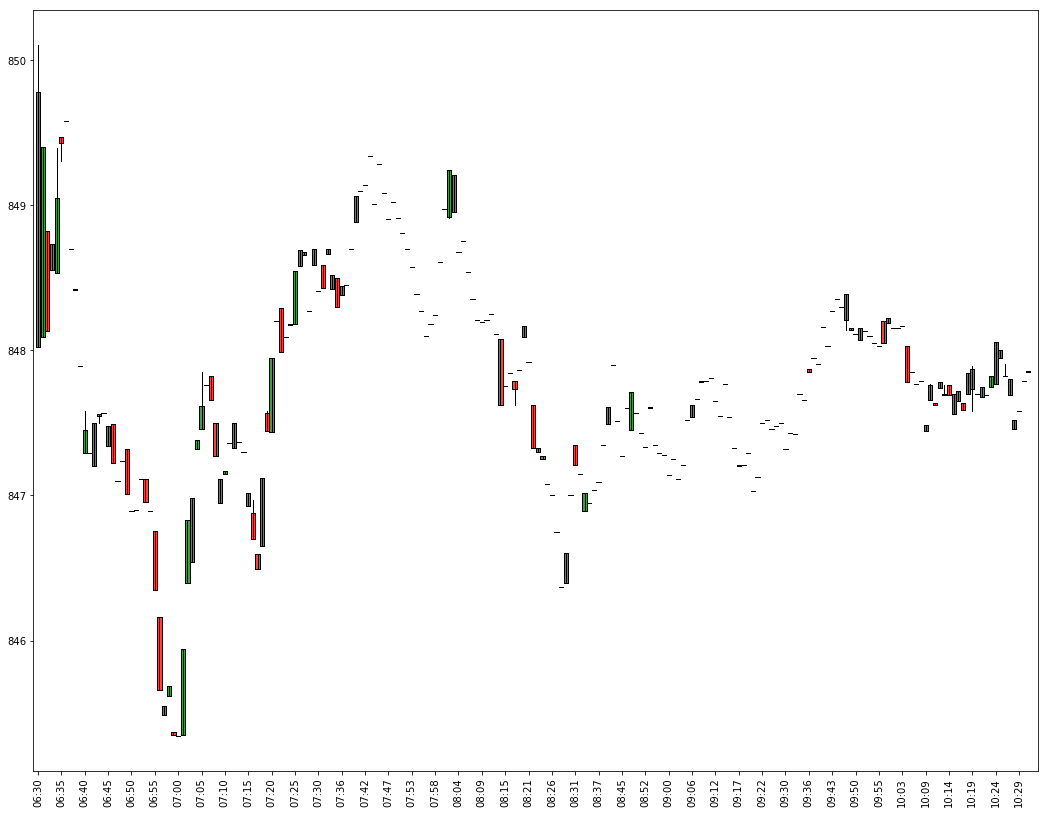

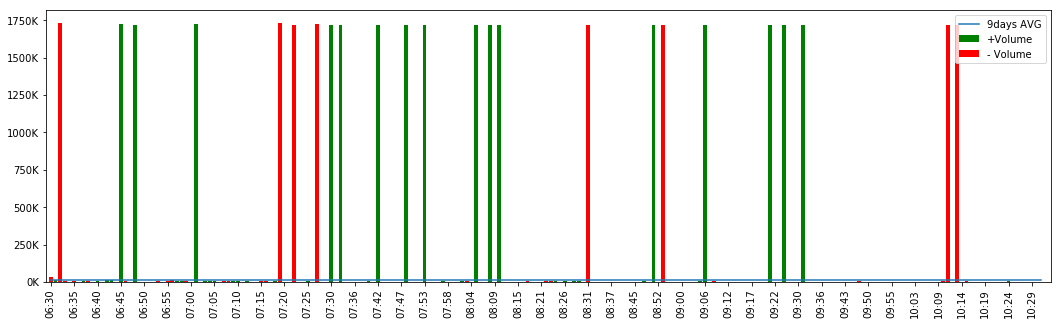

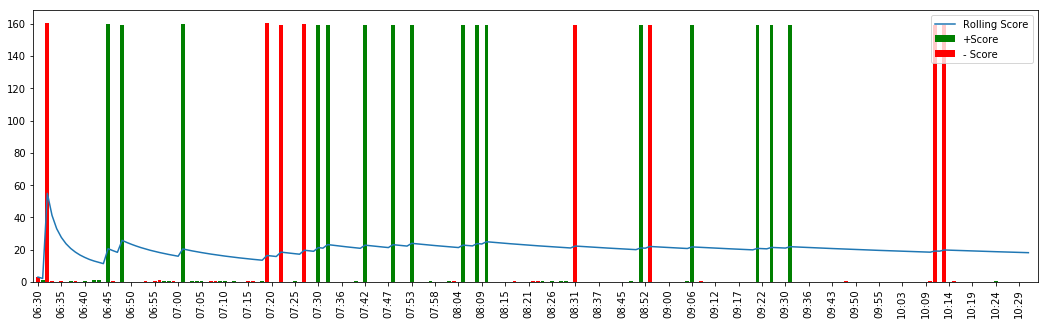

In [17]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    if not len(df):
        print("No data")
        return
    
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "GOOG"])

1. GOOG 10:32AM: Rolling Score 17.7152256424497, Current Score 0.08792969573569184


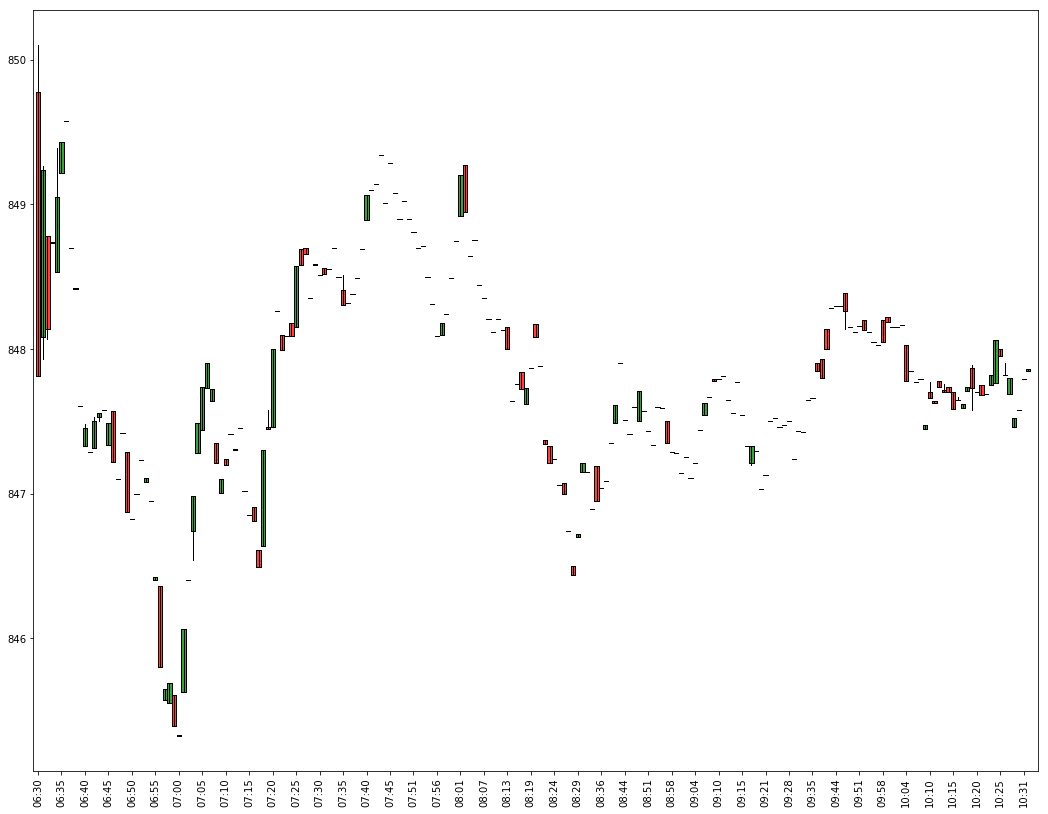

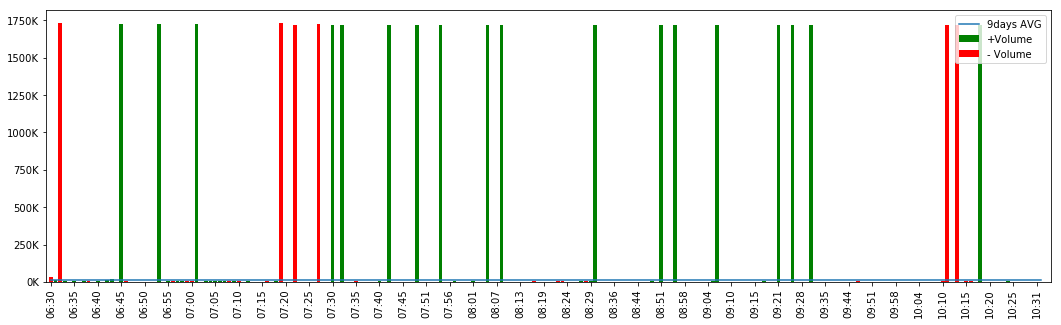

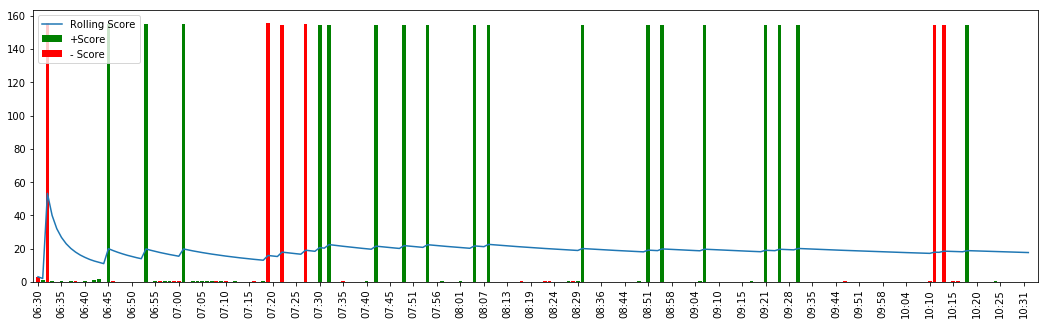

2. PCRX 10:30AM: Rolling Score 13.61331991170759, Current Score 0.06281274417411024


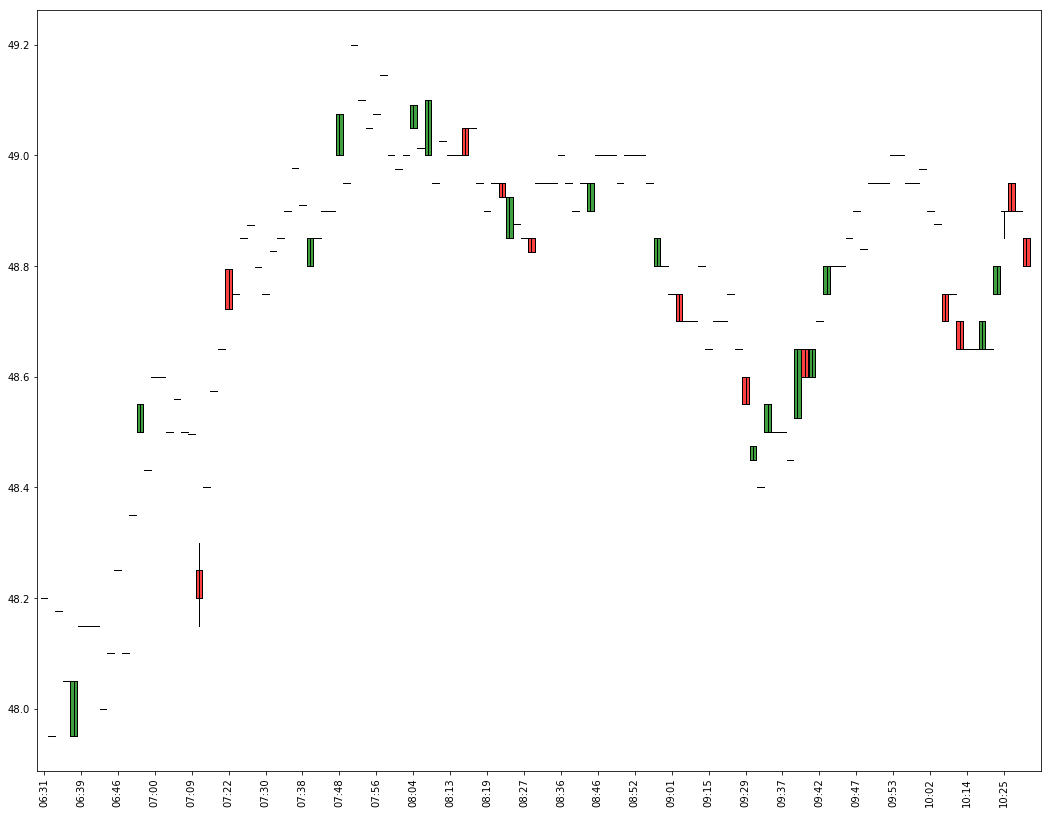

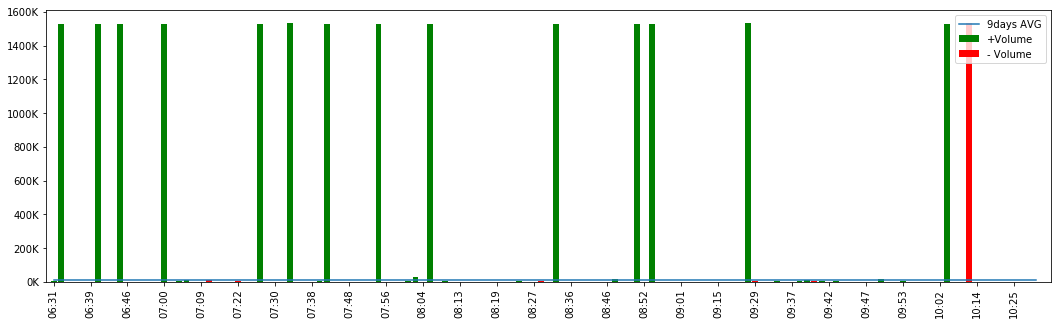

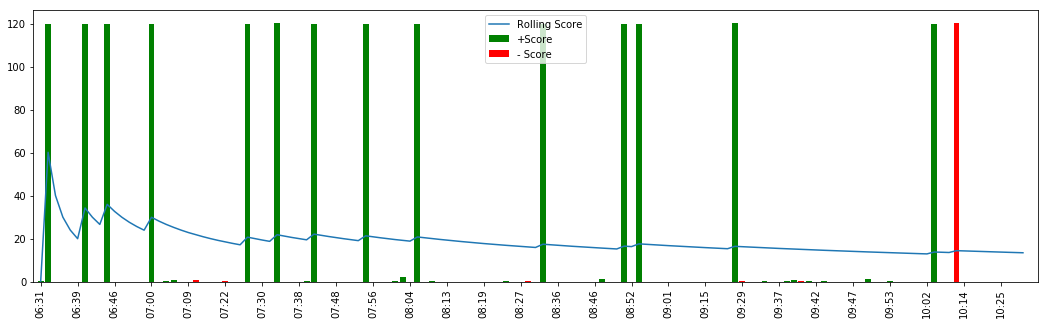

3. LOW 10:32AM: Rolling Score 1.0854019851900847, Current Score 0.49803700751992175


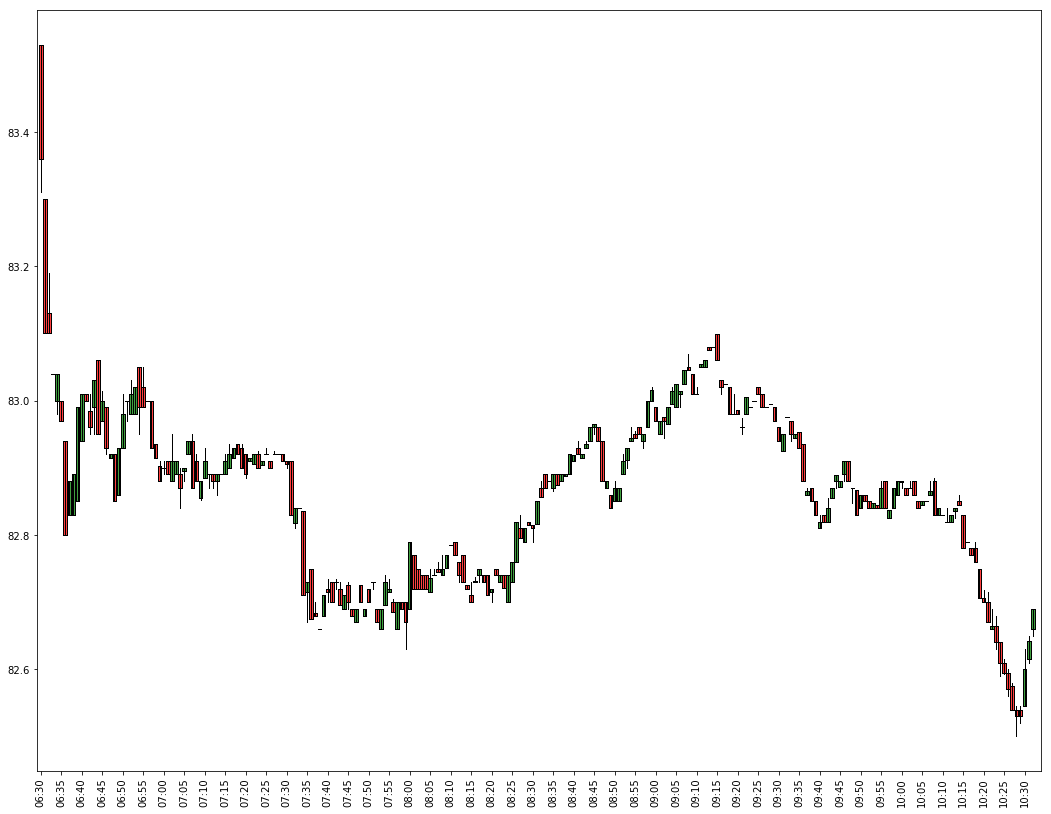

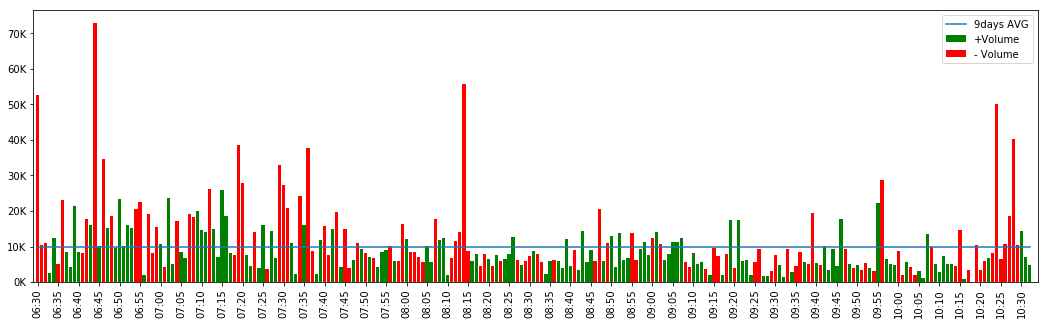

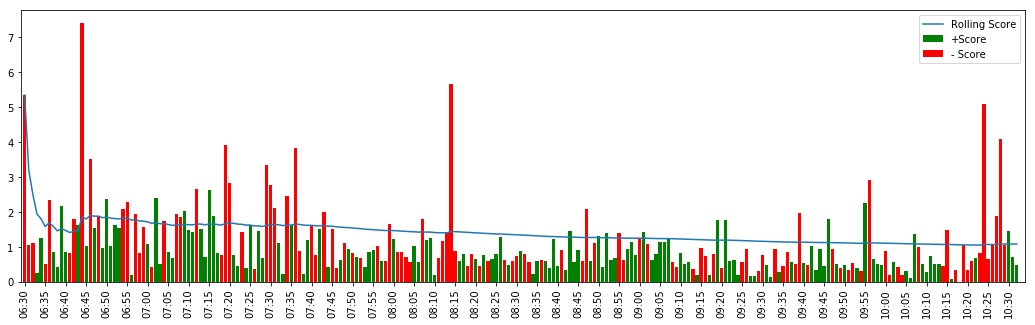

4. BAC 10:33AM: Rolling Score 1.0763943255976287, Current Score 1.258444515710566


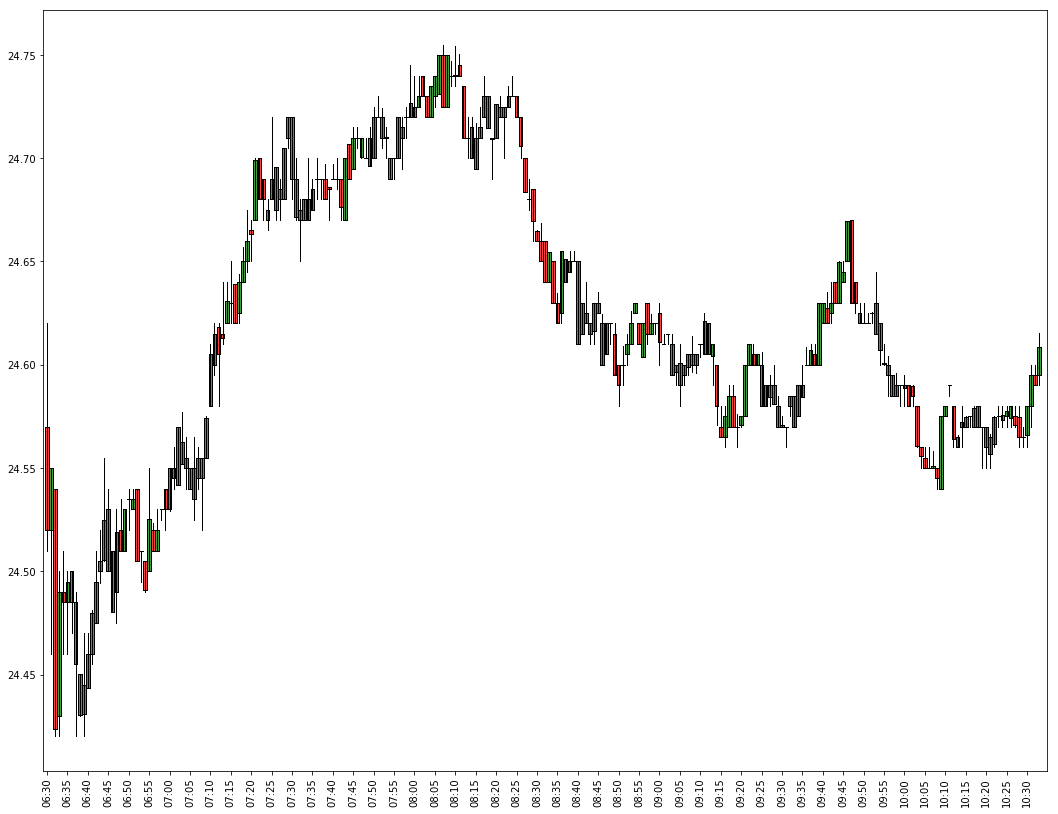

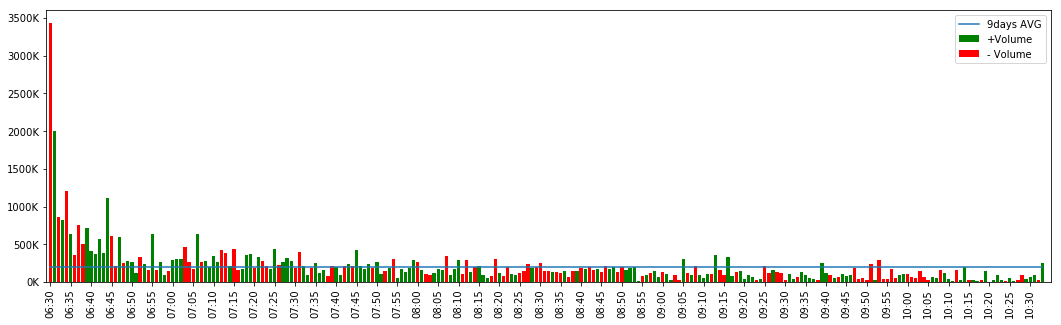

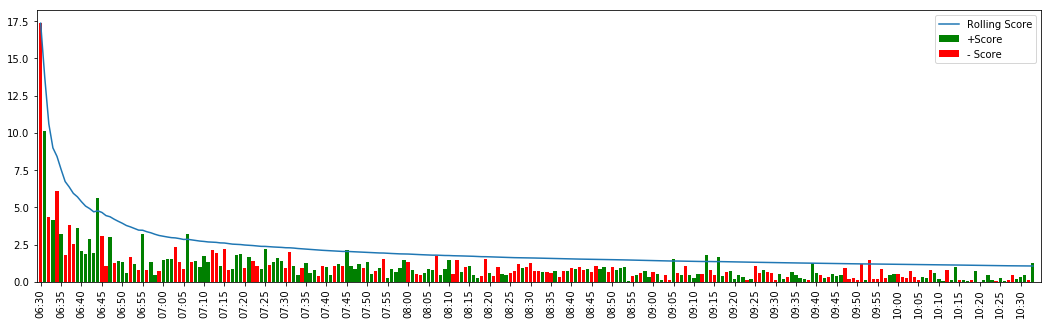

5. CRM 10:33AM: Rolling Score 0.7729682197289239, Current Score 0.48357822223114066


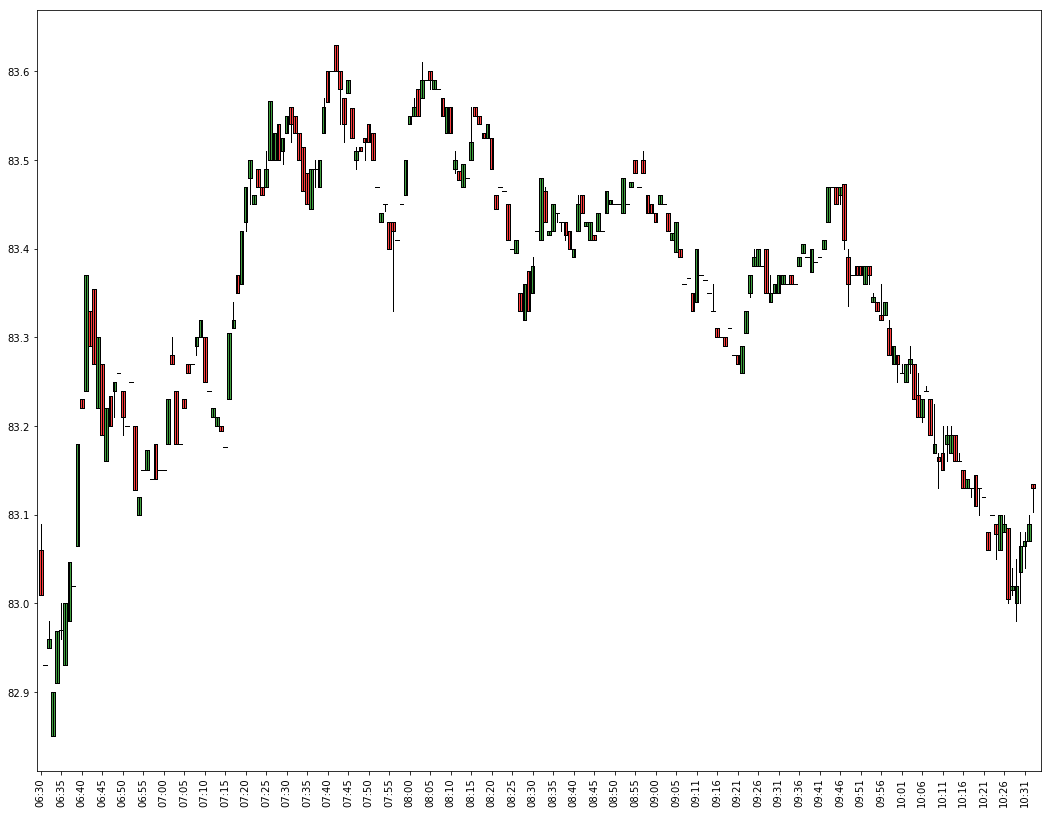

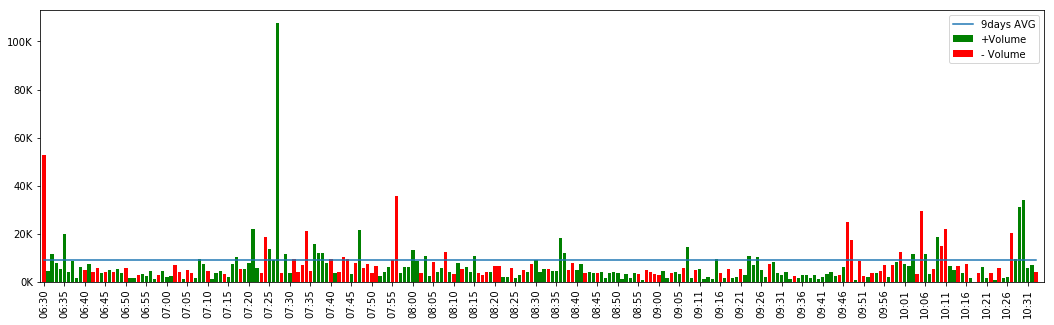

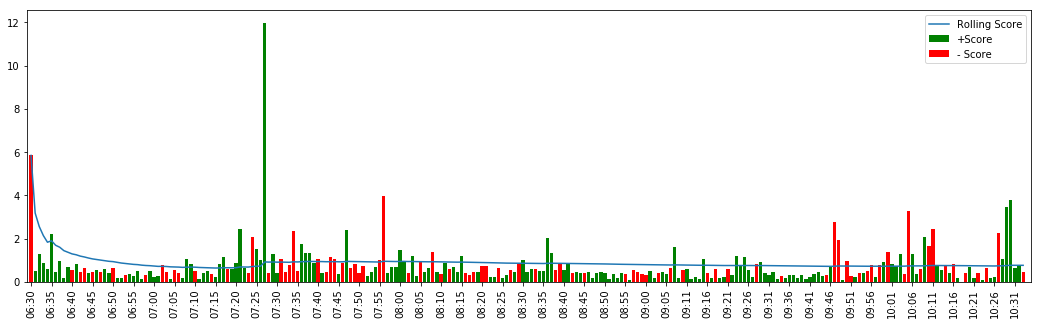

6. WTW 10:31AM: Rolling Score 0.7444410161004568, Current Score 0.0934728768874331


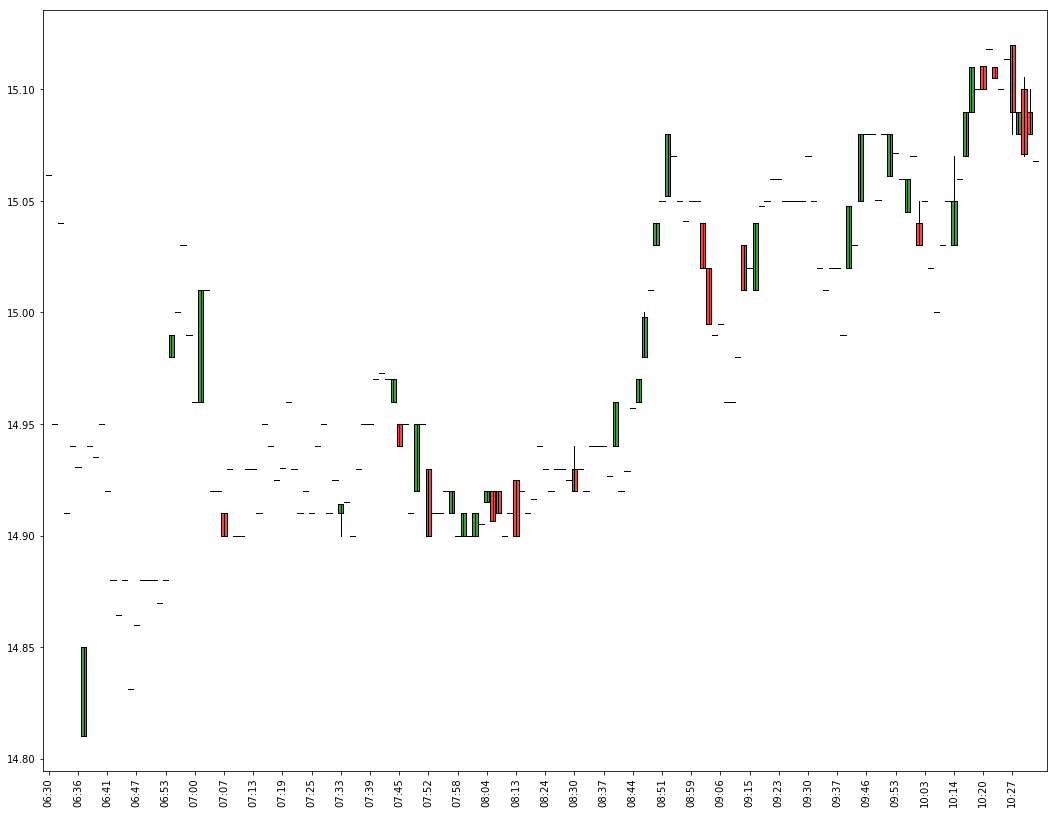

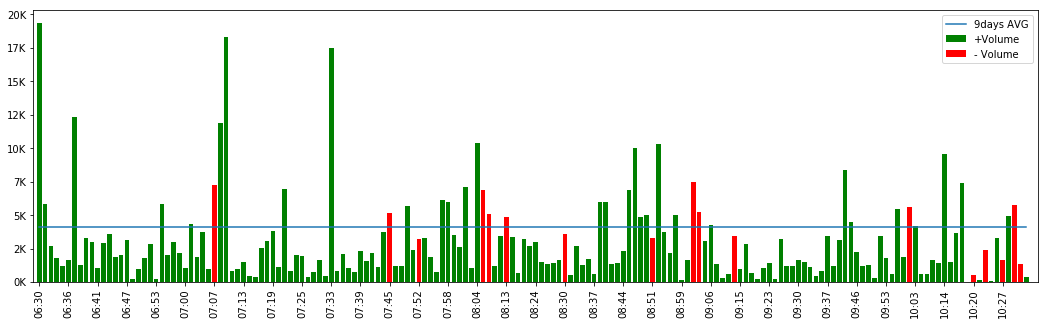

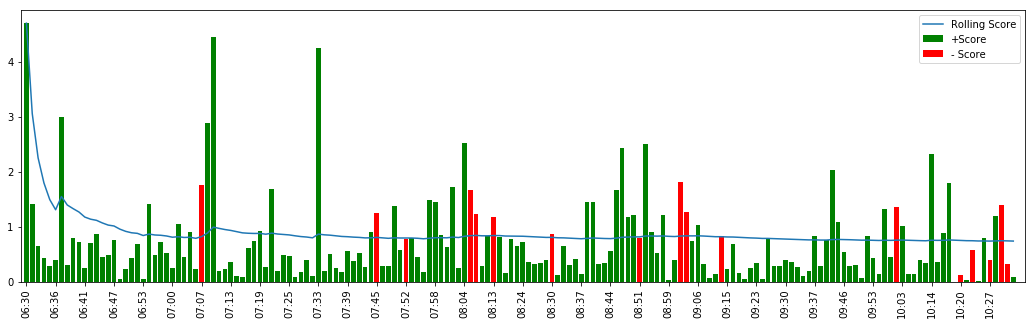

7. AAPL 10:33AM: Rolling Score 0.3917368256645333, Current Score 0.003179159581661148


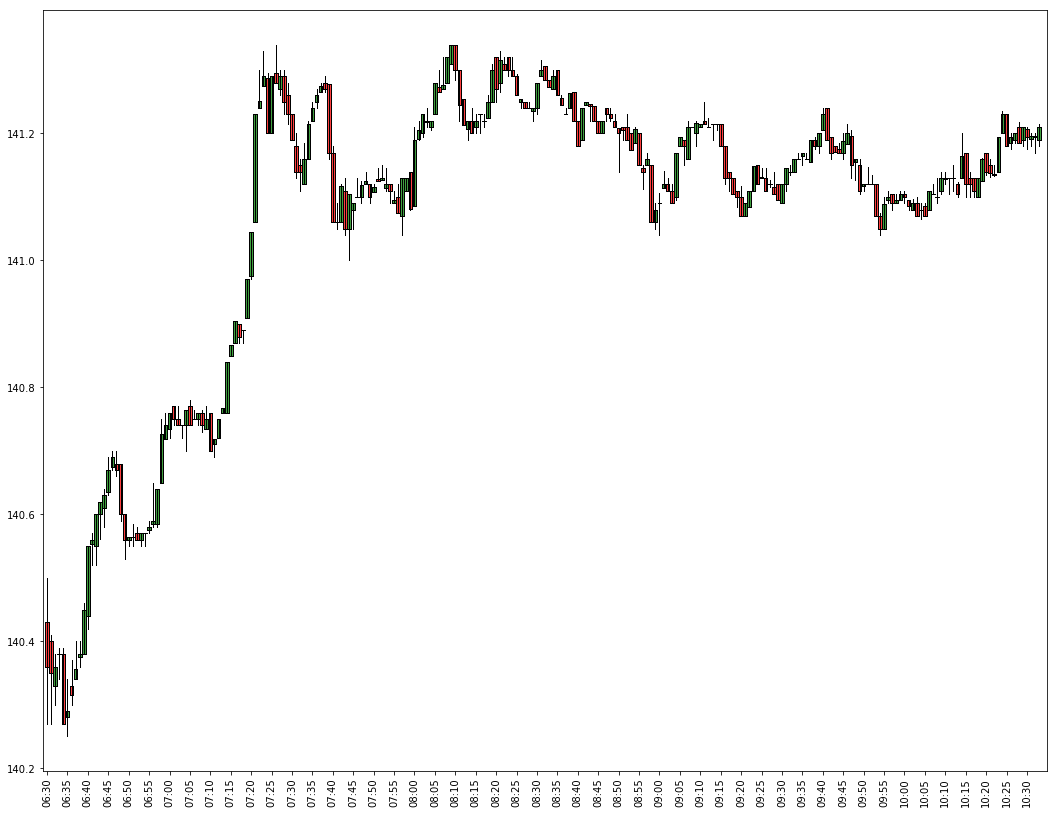

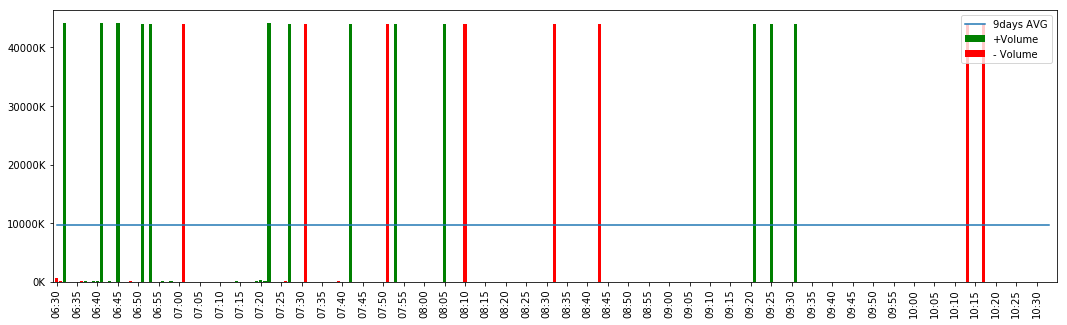

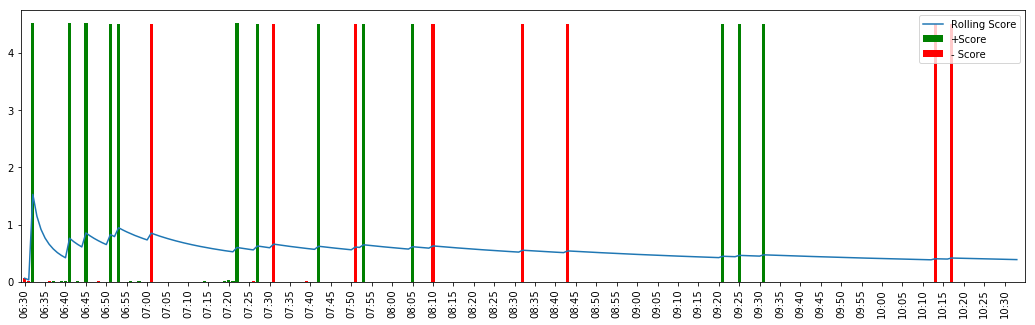

1. BAC 10:33AM: Rolling Score 1.0763943255976287, Current Score 1.258444515710566


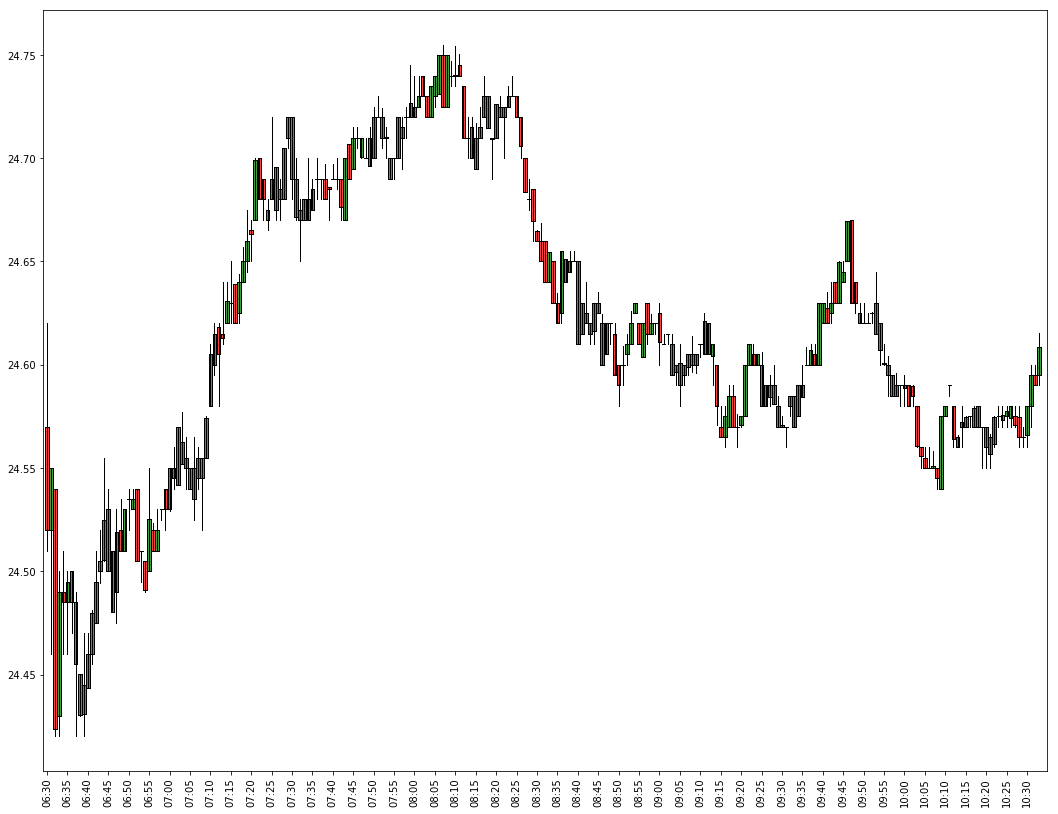

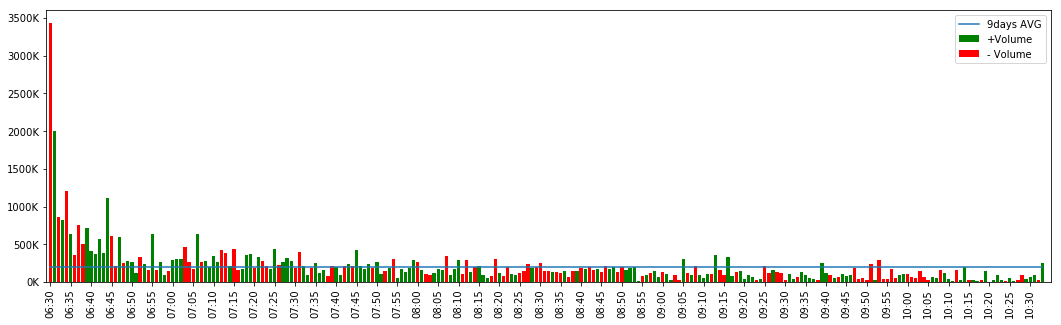

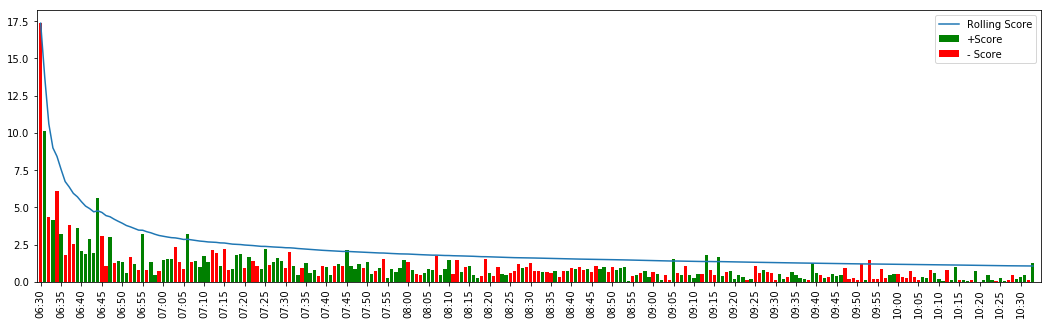

2. LOW 10:32AM: Rolling Score 1.0854019851900847, Current Score 0.49803700751992175


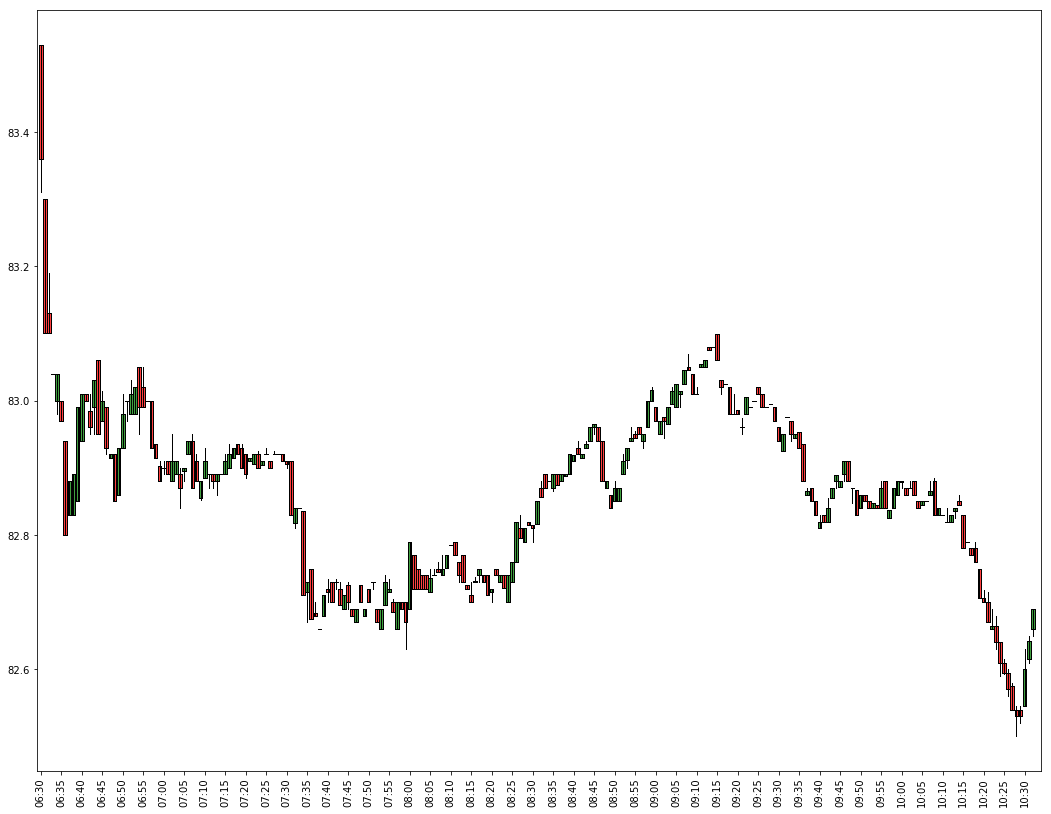

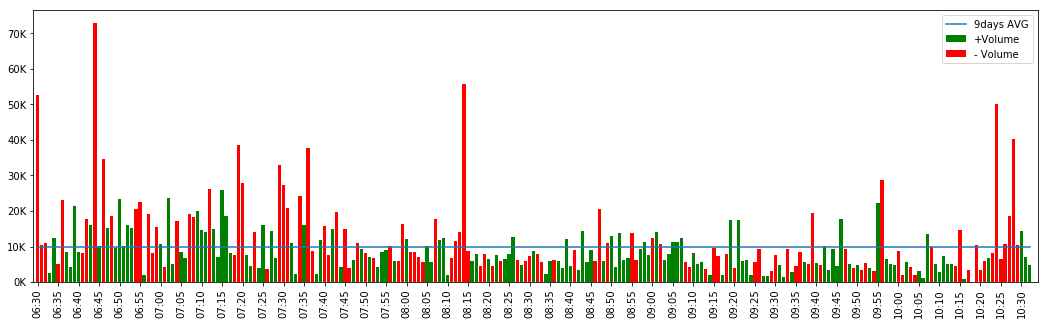

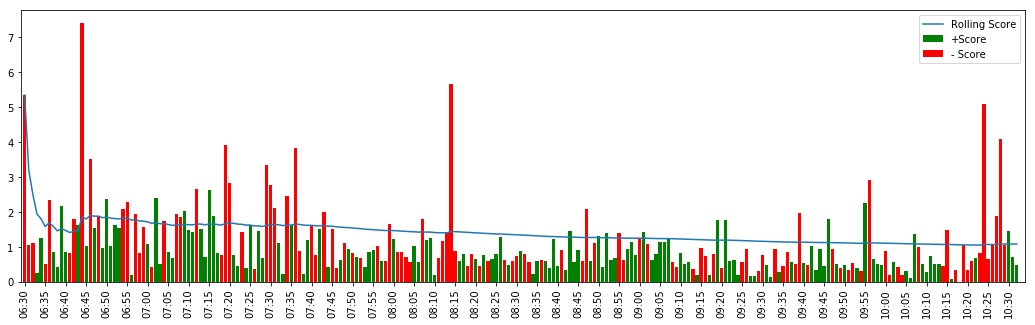

3. CRM 10:33AM: Rolling Score 0.7729682197289239, Current Score 0.48357822223114066


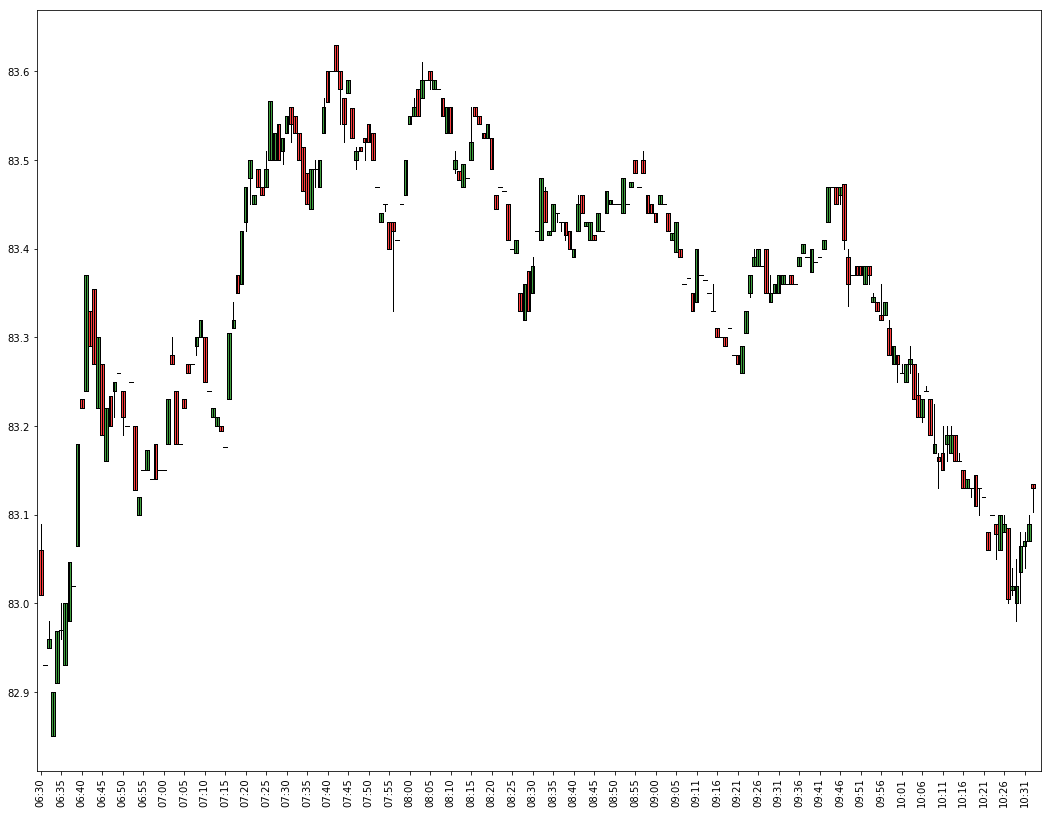

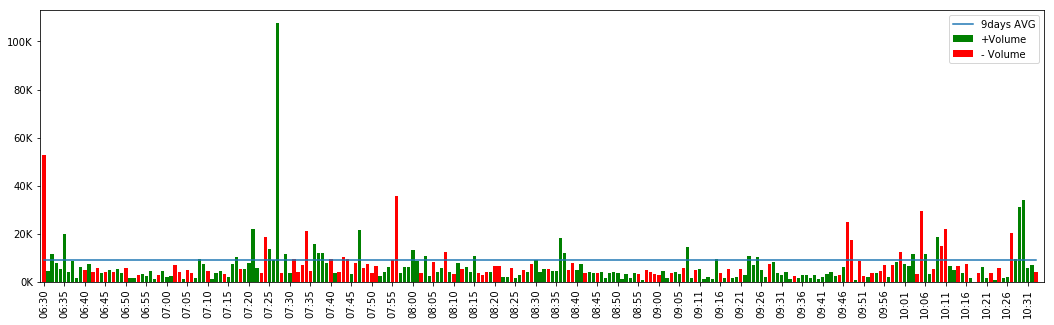

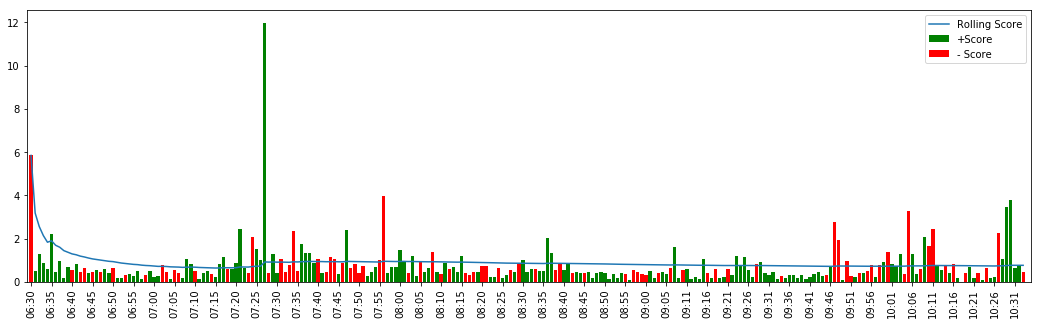

4. WTW 10:31AM: Rolling Score 0.7444410161004568, Current Score 0.0934728768874331


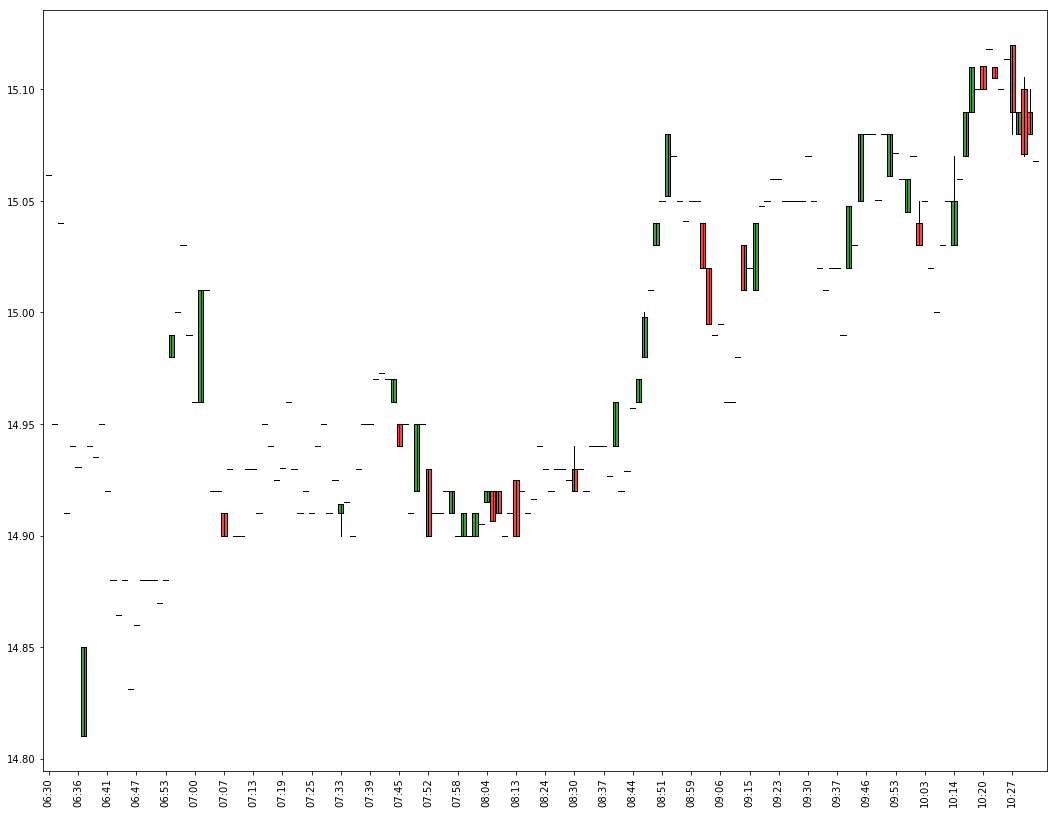

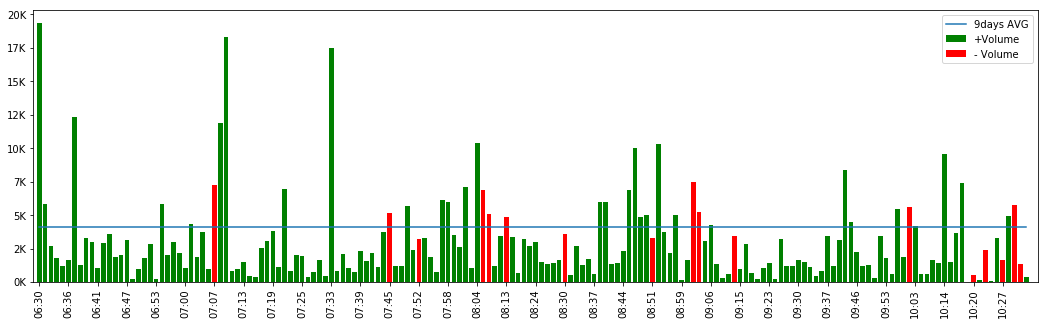

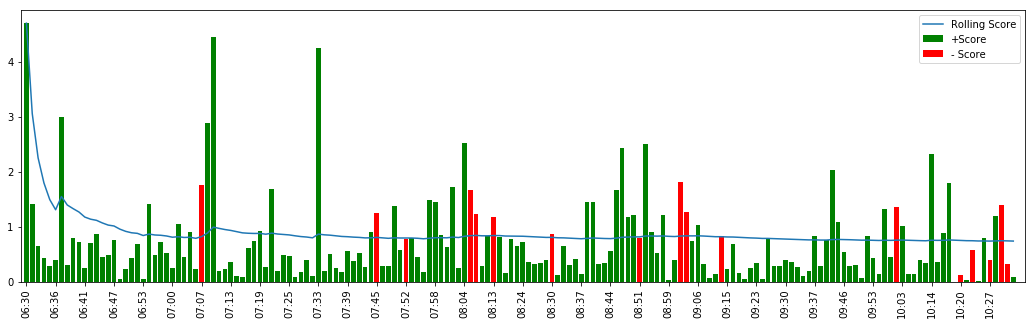

5. GOOG 10:32AM: Rolling Score 17.7152256424497, Current Score 0.08792969573569184


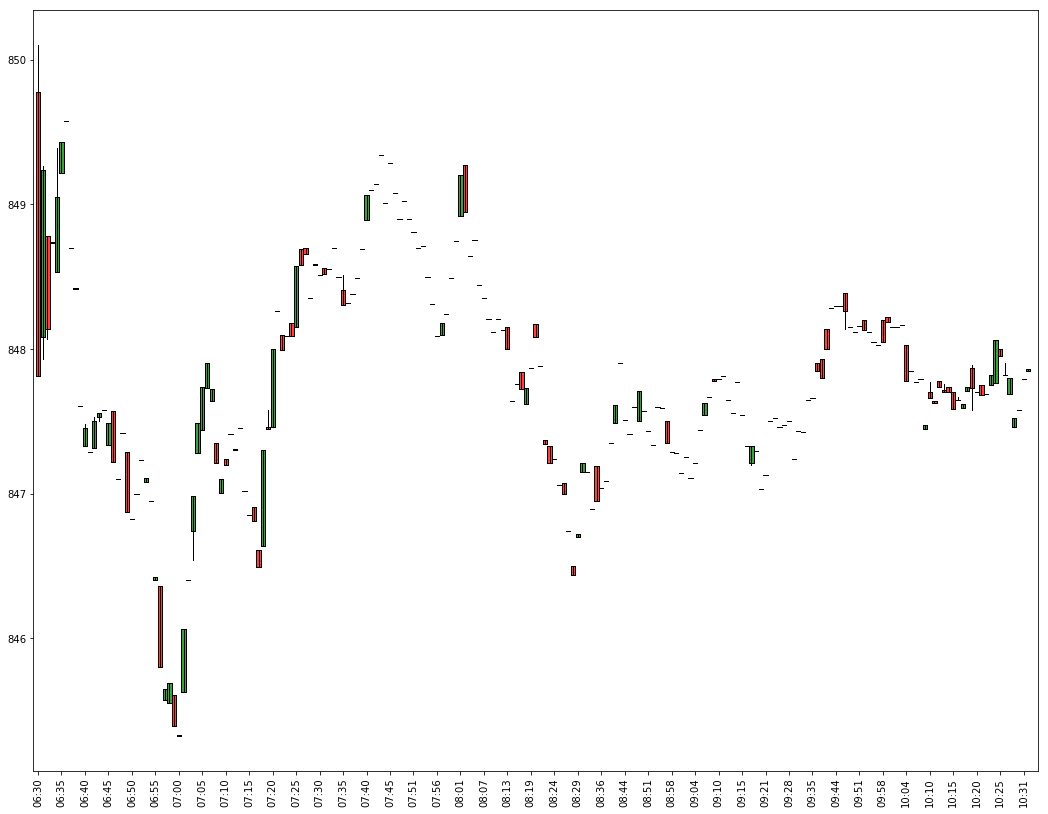

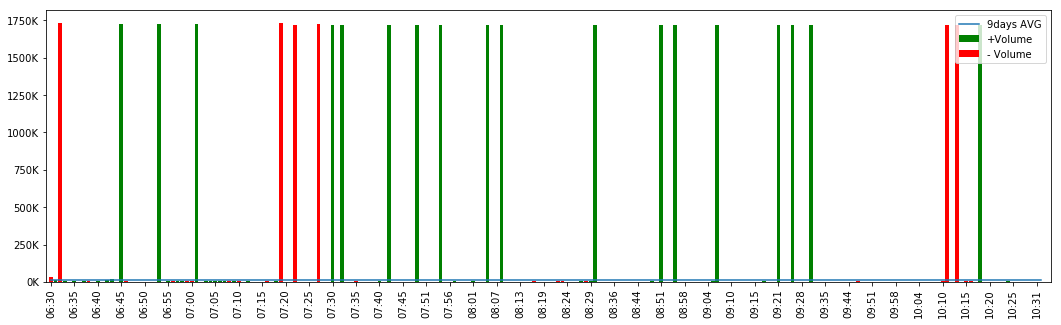

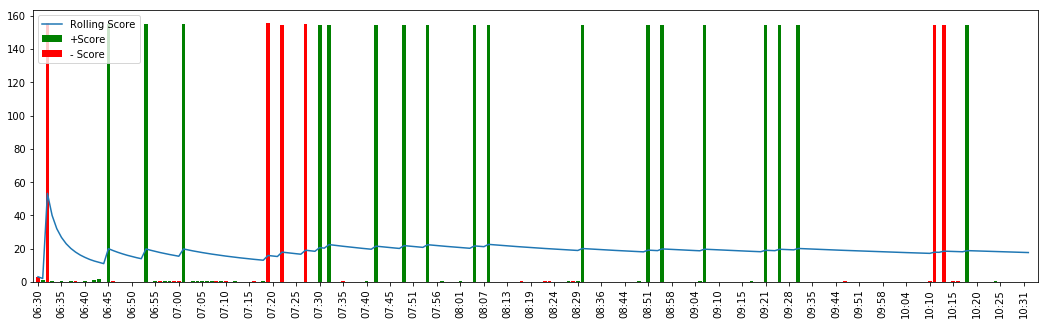

6. PCRX 10:30AM: Rolling Score 13.61331991170759, Current Score 0.06281274417411024


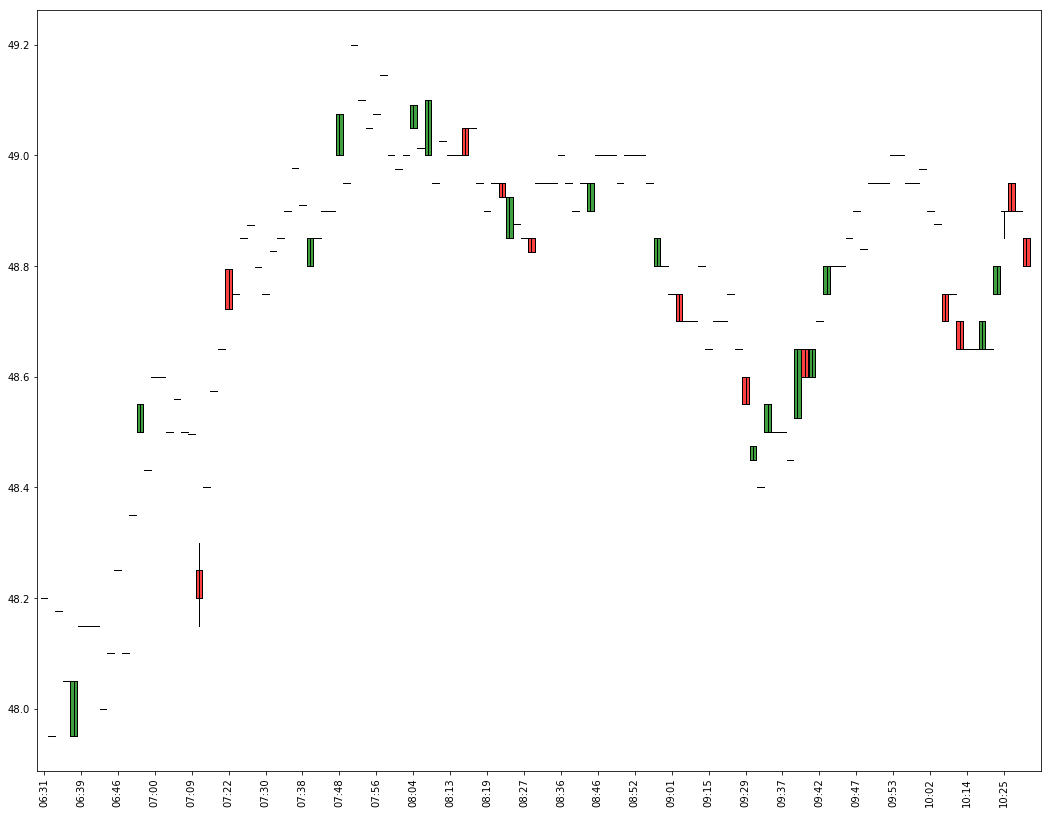

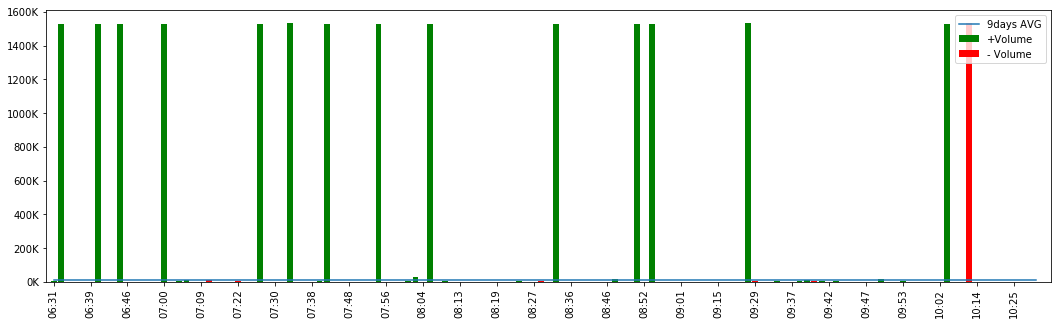

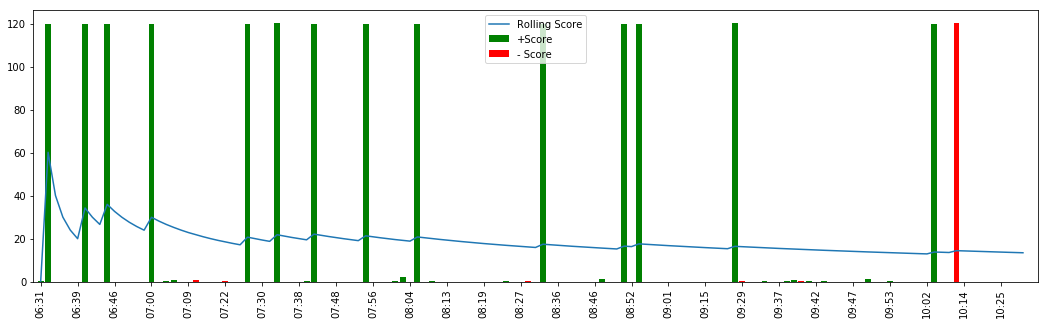

7. AAPL 10:33AM: Rolling Score 0.3917368256645333, Current Score 0.003179159581661148


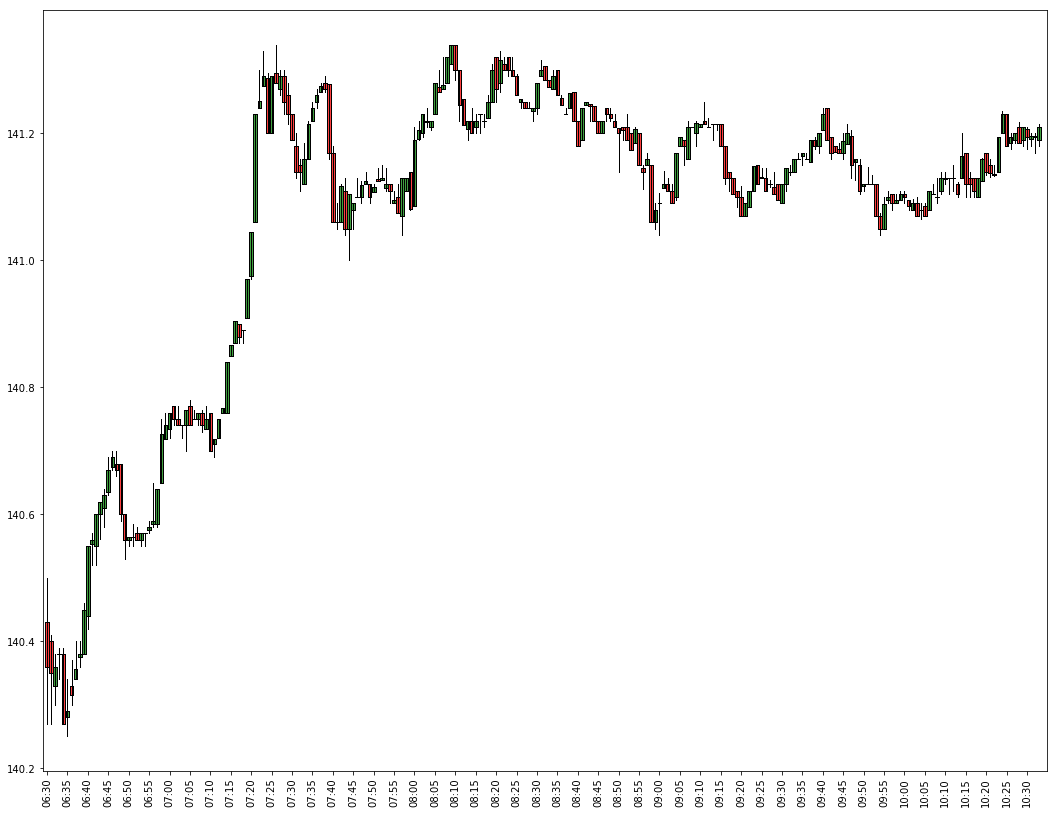

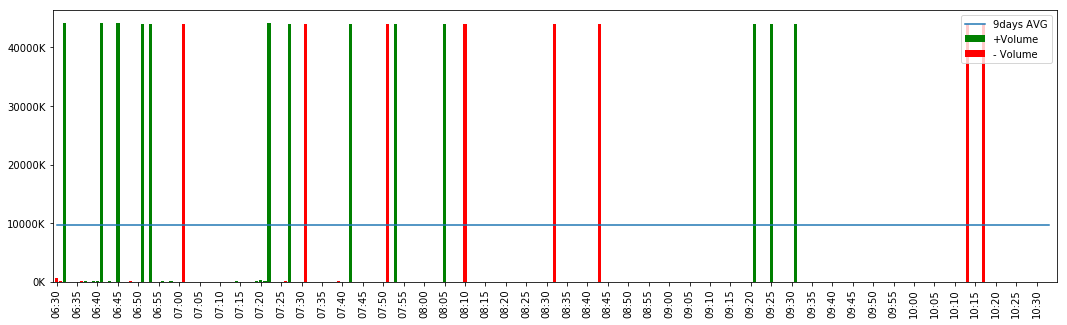

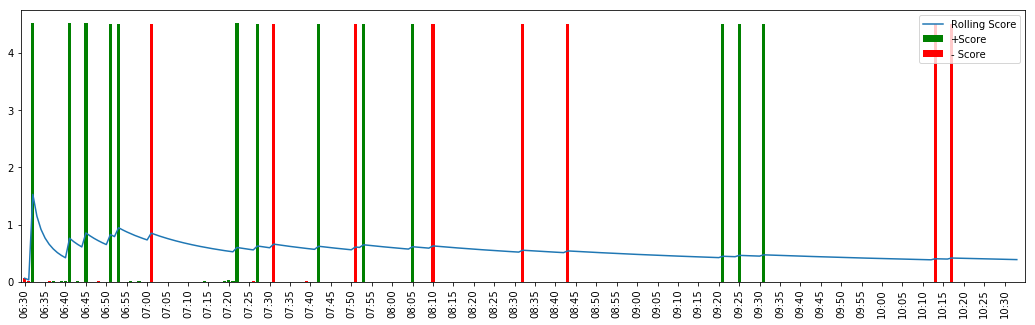

last update 2017-03-20 10:35:05.491755-07:00
prev update None
update time 0:00:34.974461


KeyboardInterrupt: 

In [18]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = 'America/Los_Angeles'
tz = pytz.timezone(LOCAL_TZ)
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None
start_date, end_date = None, None
while True:    
    now = datetime.now(tz=tz)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
        
        if end_date is None or start_date is None:
            start_date, end_date = get_trading_dates(now)  
            
        df = get_data_parallel(stocks, start_date, end_date)
        
        if df is not None:
            clear_output()
            last_minute_data = df.groupby('symbol').last().reset_index()
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else:       
        start_date, end_date = None, None
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)